# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Fathi Farhat
- Email: farhatfathi107@gmail.com
- Id Dicoding: farhatfathi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
import warnings
importances = None

warnings.filterwarnings("ignore")  # suppress warnings for clean output

In [3]:
import streamlit as st
import pickle

### Menyiapkan data yang akan digunakan

In [4]:
# mengambil link dataset dari Github
link = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'
df = pd.read_csv(link, delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Dataframe Info

In [5]:
df.shape

(4424, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Identify Null Values

In [7]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


No missing value!

### identify Outliers

In [8]:
# identify outliers

def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [9]:
# Identify kolom numerik untuk outlier analysis
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [10]:
# cari tahu jumlah outliers yang ada
for i, col in enumerate(numerical_cols):
    outliers = find_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers")

Marital_status: 505 outliers
Application_mode: 0 outliers
Application_order: 541 outliers
Course: 442 outliers
Daytime_evening_attendance: 483 outliers
Previous_qualification: 707 outliers
Previous_qualification_grade: 179 outliers
Nacionality: 110 outliers
Mothers_qualification: 0 outliers
Fathers_qualification: 0 outliers
Mothers_occupation: 182 outliers
Fathers_occupation: 177 outliers
Admission_grade: 86 outliers
Displaced: 0 outliers
Educational_special_needs: 51 outliers
Debtor: 503 outliers
Tuition_fees_up_to_date: 528 outliers
Gender: 0 outliers
Scholarship_holder: 1099 outliers
Age_at_enrollment: 441 outliers
International: 110 outliers
Curricular_units_1st_sem_credited: 577 outliers
Curricular_units_1st_sem_enrolled: 424 outliers
Curricular_units_1st_sem_evaluations: 158 outliers
Curricular_units_1st_sem_approved: 180 outliers
Curricular_units_1st_sem_grade: 726 outliers
Curricular_units_1st_sem_without_evaluations: 294 outliers
Curricular_units_2nd_sem_credited: 530 outliers

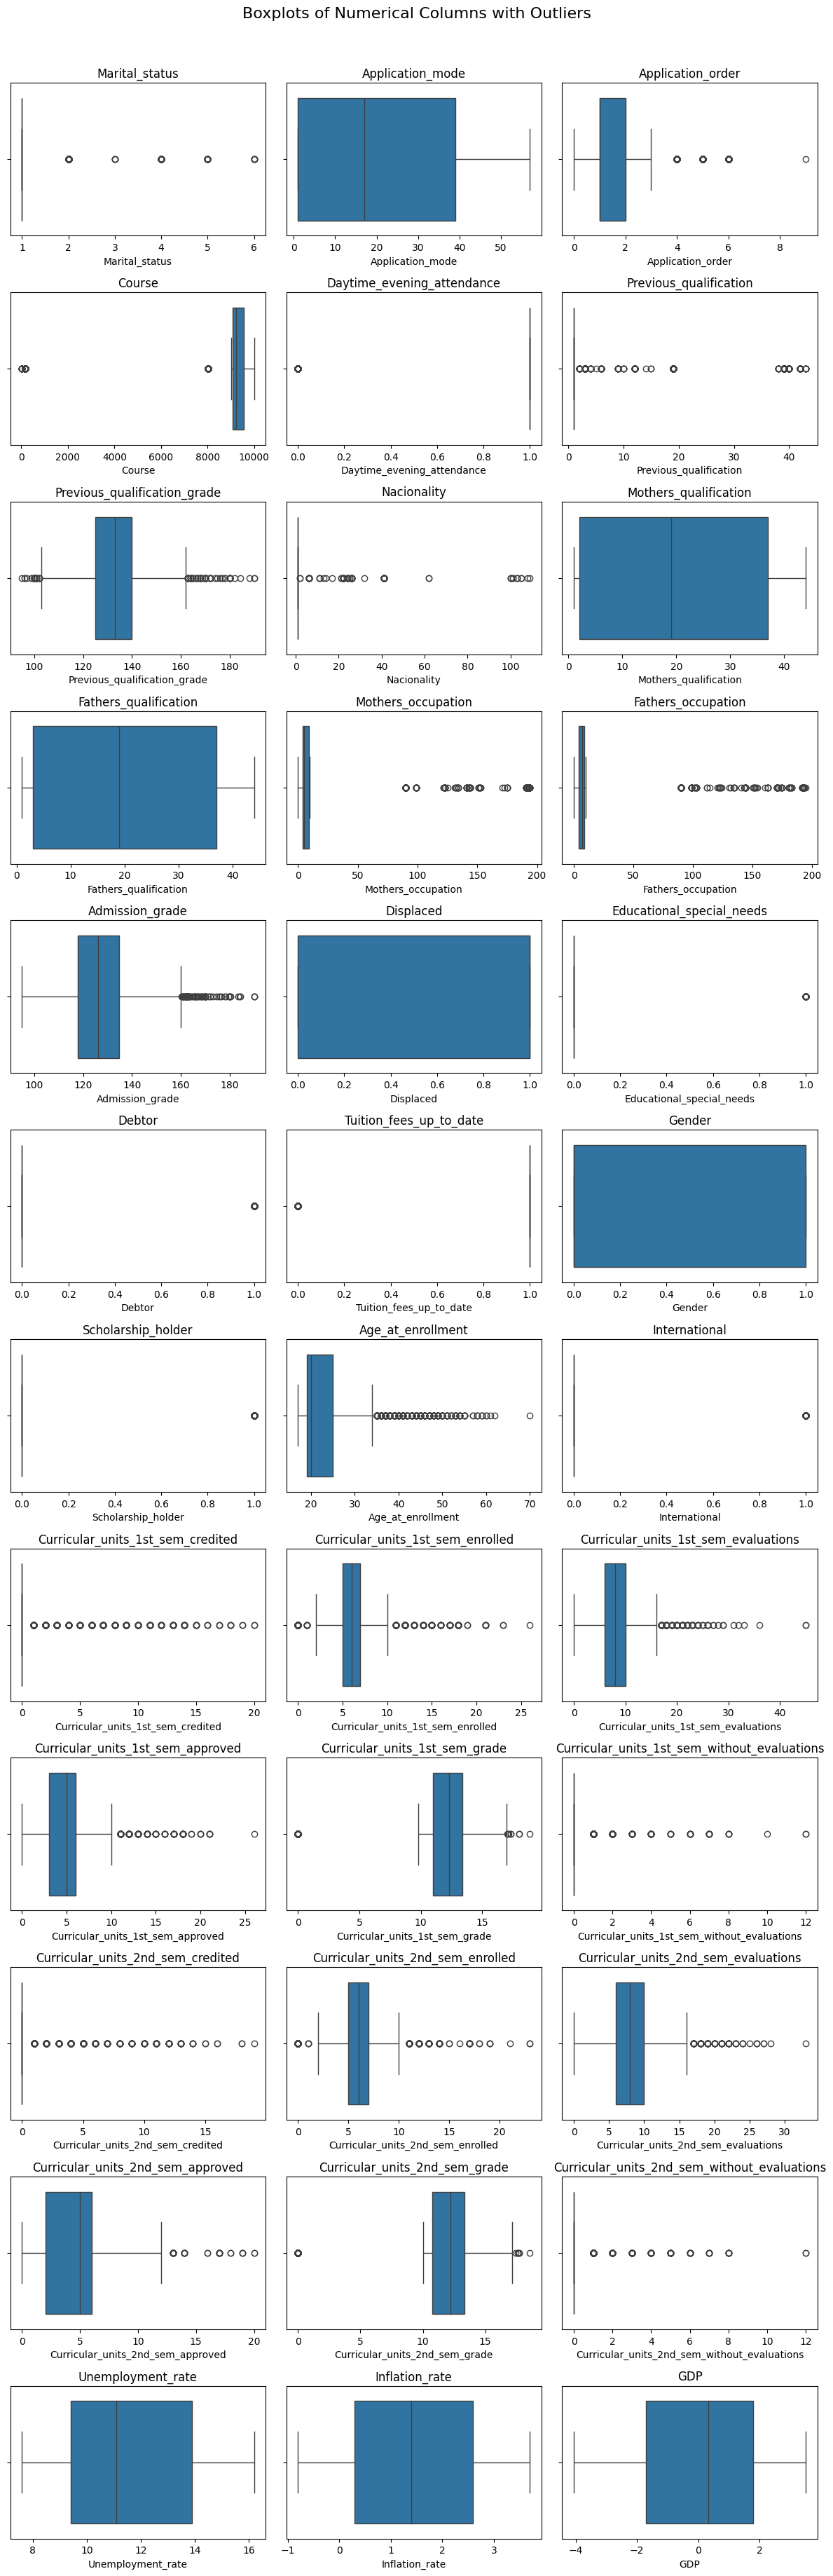

In [11]:

# Tentukan jumlah kolom per baris untuk layout grid
cols_per_row = 3
num_plots = len(numerical_cols)
num_rows = int(np.ceil(num_plots / cols_per_row))

# Buat figure dan axes
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 4, num_rows * 3))
axes = axes.flatten()

# Loop dan plot
for i, col in enumerate(numerical_cols):
    outliers = find_outliers_iqr(df[col])
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)

# Hapus subplot kosong jika jumlah plot tidak habis dibagi cols_per_row
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns with Outliers', fontsize=16, y=1.02)
plt.show()

Outliers exist in some important features with big amount of quantity. We decide not to drop any outliers to keep the originality and proportion of the data

### Feature Correlation

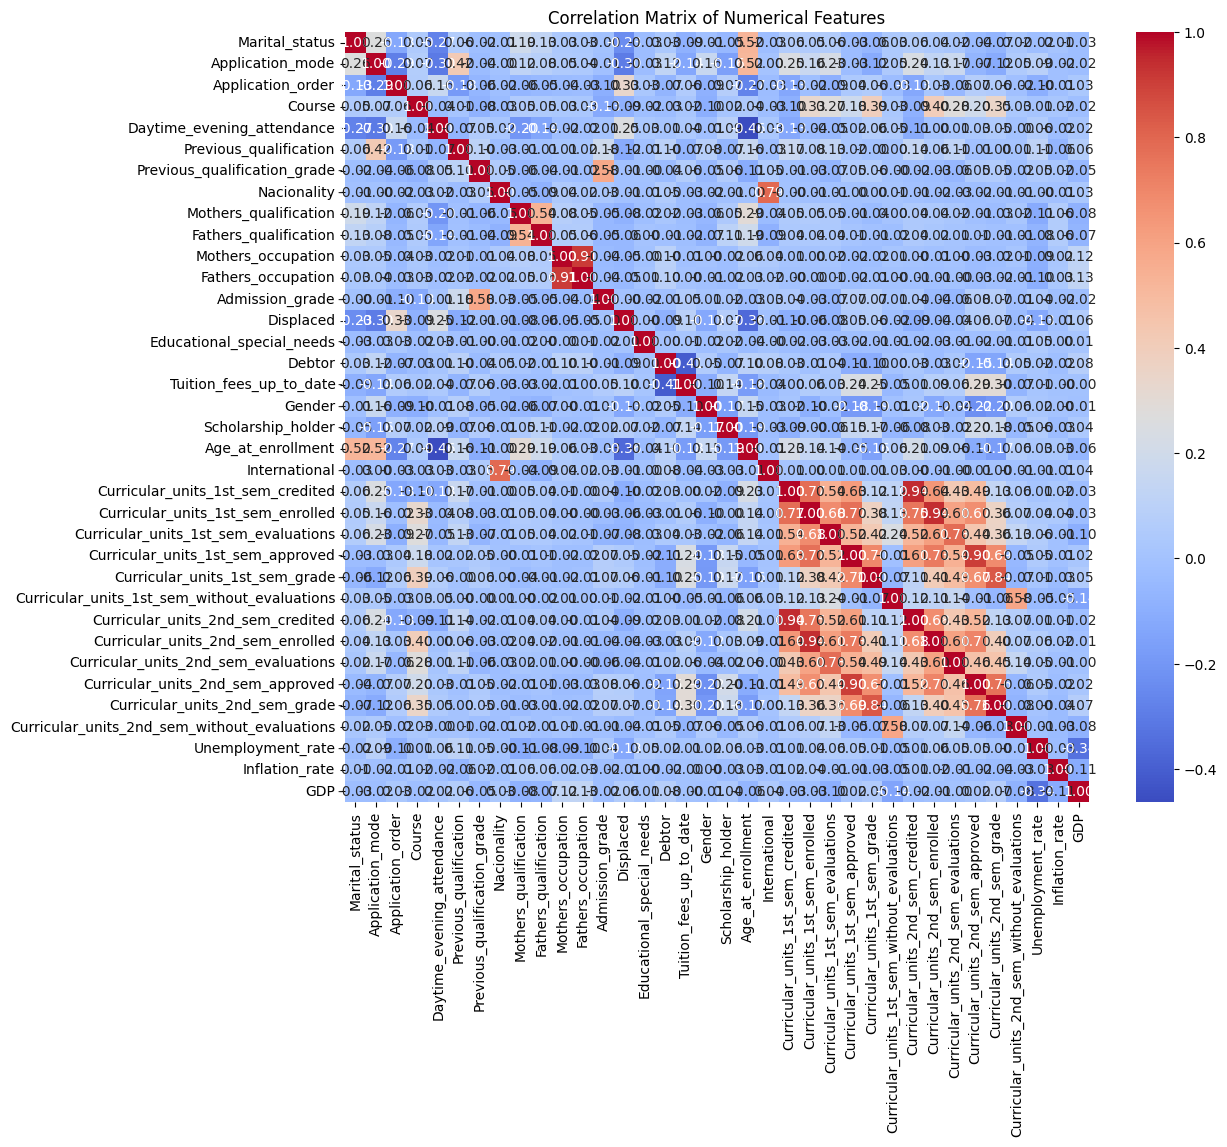

In [12]:
# kalkulasikan correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize correlation matrix dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preparation / Preprocessing

### Feature Engineering

At this step, we're going to make new features that might have a high correlation with target (`Status`).

We make a feature approval rate which is the ratio between `Curricular_units_approved` and `enrolled` for semester 1 & 2.

In [13]:
df['approval_rate_sem1'] = df['Curricular_units_1st_sem_approved'] / (df['Curricular_units_1st_sem_enrolled'] + 1e-5)
df['approval_rate_sem2'] = df['Curricular_units_2nd_sem_approved'] / (df['Curricular_units_2nd_sem_enrolled'] + 1e-5)

### Encoding

Encoding process will use LabelEncoder to encode categorical data from `Status`

In [14]:
# definisikan label encoder yang digunakan
le = LabelEncoder()

# fit transform `status`
df['Status'] = le.fit_transform(df['Status'])

In [15]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,approval_rate_sem1,approval_rate_sem2
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000,0.000000
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,2,0.999998,0.999998
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000,0.000000
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,2,0.999998,0.833332
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,2,0.833332,0.999998


### Split Data

Splitting data that is used for training model purpose with train-test proportion of 80:20. Then train data are being splitted as train and validation data with the proportion of 80:20.

In [16]:
# Pisahkan fitur dan target
X = df.drop(columns='Status')
y = df['Status']

In [17]:
# split menjadi train_val dan test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# split train_val menjadi train dan validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

### Scaling

We will normalize data withrange 0-1 using standard scaler

In [18]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform pada splitted data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [19]:
# Base models
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier(random_state=42)
nb = GaussianNB()

# Ensemble models
voting = VotingClassifier(estimators=[
    ('lr', lr), ('rf', rf), ('svm', svm), ('knn', knn), ('gb', gb)
], voting='soft')

stacking = StackingClassifier(estimators=[
    ('rf', rf), ('svm', svm), ('gb', gb)
], final_estimator=LogisticRegression(max_iter=1000))

# Kumpulan semua model
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "SVM": svm,
    "KNN": knn,
    "Gradient Boosting": gb,
    "Voting Ensemble": voting,
    "Stacking Ensemble": stacking
}

# Training dan evaluasi di validation set
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_val_pred)
    results[name] = acc
    print(f"{name} Accuracy on Validation Set: {acc:.4f}")

# Menampilkan model dengan akurasi terbaik
best_model_name = max(results, key=results.get)
print(f"\nBest Model on Validation Set: {best_model_name}")

# Evaluasi model terbaik di test set
best_model = models[best_model_name]
y_test_pred = best_model.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Logistic Regression Accuracy on Validation Set: 0.7655
Random Forest Accuracy on Validation Set: 0.7811
SVM Accuracy on Validation Set: 0.7613
KNN Accuracy on Validation Set: 0.7105
Gradient Boosting Accuracy on Validation Set: 0.7712
Voting Ensemble Accuracy on Validation Set: 0.7797
Stacking Ensemble Accuracy on Validation Set: 0.7698

Best Model on Validation Set: Random Forest

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       284
           1       0.61      0.40      0.48       159
           2       0.81      0.92      0.86       442

    accuracy                           0.78       885
   macro avg       0.74      0.70      0.71       885
weighted avg       0.77      0.78      0.77       885



## Evaluation

### Confusion Matrix

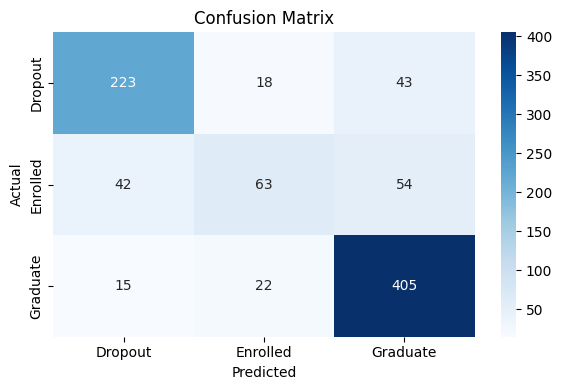

In [20]:
# Prediksi di test set
y_test_pred = best_model.predict(X_test_scaled)

# Confusion Matrix dengan label numerik
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

# Plotting confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### ROC Curve

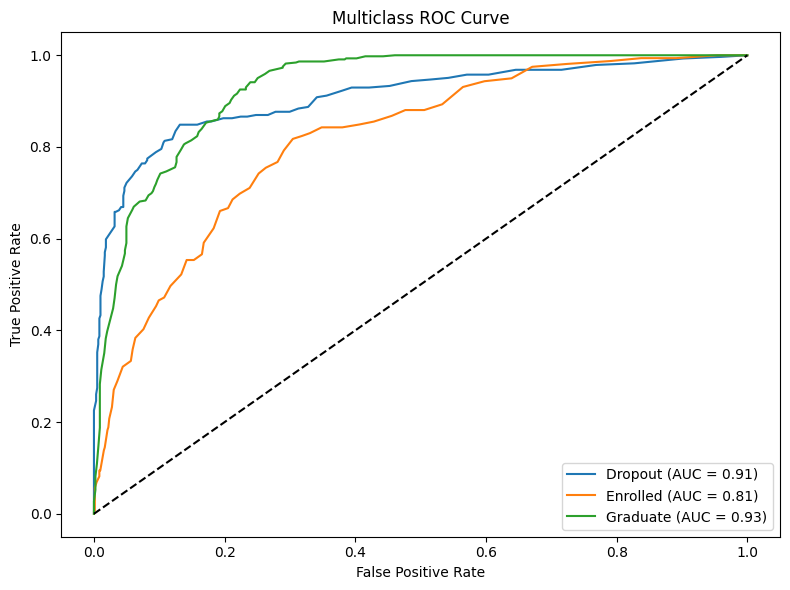

In [21]:
# Binarisasi label (sesuai urutan 0 = Dropout, 1 = Enrolled, 2 = Graduate)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = best_model.predict_proba(X_test_scaled)

# ROC curve
plt.figure(figsize=(8, 6))
for i, label in enumerate(['Dropout', 'Enrolled', 'Graduate']):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

### Feature Importance

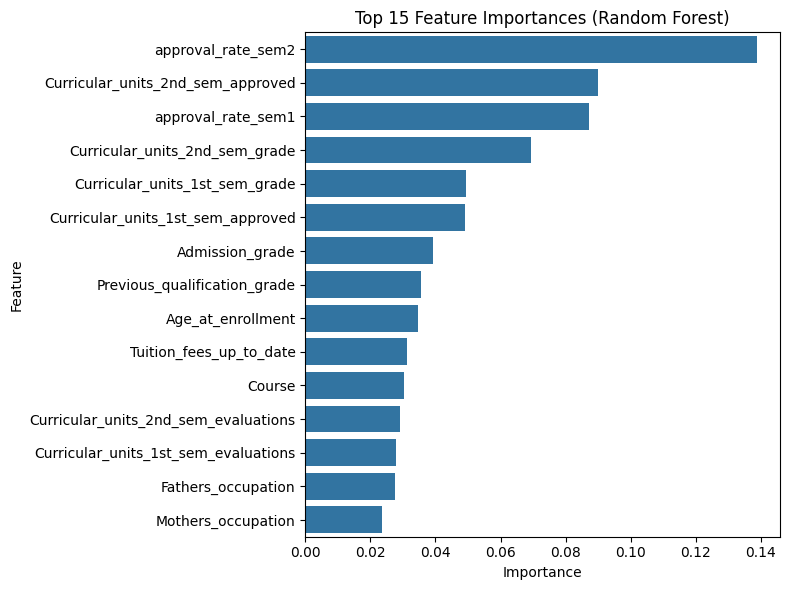

In [22]:
# Pastikan X adalah DataFrame
feature_names = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 15 fitur
plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices][:15], y=np.array(feature_names)[indices][:15])
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [23]:
# Top 15 features
top_15_indices = indices[:15]
top_15_features = np.array(feature_names)[top_15_indices]
top_15_importances = importances[top_15_indices]

print("Top 15 features and their importances:")
for feature, importance in zip(top_15_features, top_15_importances):
    print(f"- {feature}: {importance:.4f}")

Top 10 features and their importances:
- approval_rate_sem2: 0.1390
- Curricular_units_2nd_sem_approved: 0.0901
- approval_rate_sem1: 0.0871
- Curricular_units_2nd_sem_grade: 0.0695
- Curricular_units_1st_sem_grade: 0.0495
- Curricular_units_1st_sem_approved: 0.0491
- Admission_grade: 0.0391
- Previous_qualification_grade: 0.0356
- Age_at_enrollment: 0.0347
- Tuition_fees_up_to_date: 0.0312
- Course: 0.0303
- Curricular_units_2nd_sem_evaluations: 0.0290
- Curricular_units_1st_sem_evaluations: 0.0278
- Fathers_occupation: 0.0275
- Mothers_occupation: 0.0235


In [24]:
# classification report
print(classification_report(y_test, y_test_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))

              precision    recall  f1-score   support

     Dropout       0.80      0.79      0.79       284
    Enrolled       0.61      0.40      0.48       159
    Graduate       0.81      0.92      0.86       442

    accuracy                           0.78       885
   macro avg       0.74      0.70      0.71       885
weighted avg       0.77      0.78      0.77       885



## Deployment

### Save Model

At this step, we're about to save our best model (random forest classifier) and the scaler used for model training. we do this step in order to be able to run our prediction app on Streamlit, which we put the code in separated file.

In [25]:
# Inisialisasi ulang scaler dan model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Simpan model Random Forest
pickle.dump(rf, open("rf_model.pkl", "wb"))

# Simpan StandardScaler
pickle.dump(scaler, open("standard_scaler.pkl", "wb"))

print("Model Random Forest dan StandardScaler berhasil disimpan.")

Model Random Forest dan StandardScaler berhasil disimpan.
